# **Cleaning Merge (Flats + House) Data**  


- ## Pre-processing steps for merging datasets

 1. Load the flats dataset


 2. Clean the flats dataset


 3. Load the houses dataset


 4. Clean the houses dataset


 5. **Merge the cleaned datasets**


 6. **Perform a second round of cleaning on the merged dataset**


 7. **Save the cleaned dataset**
---

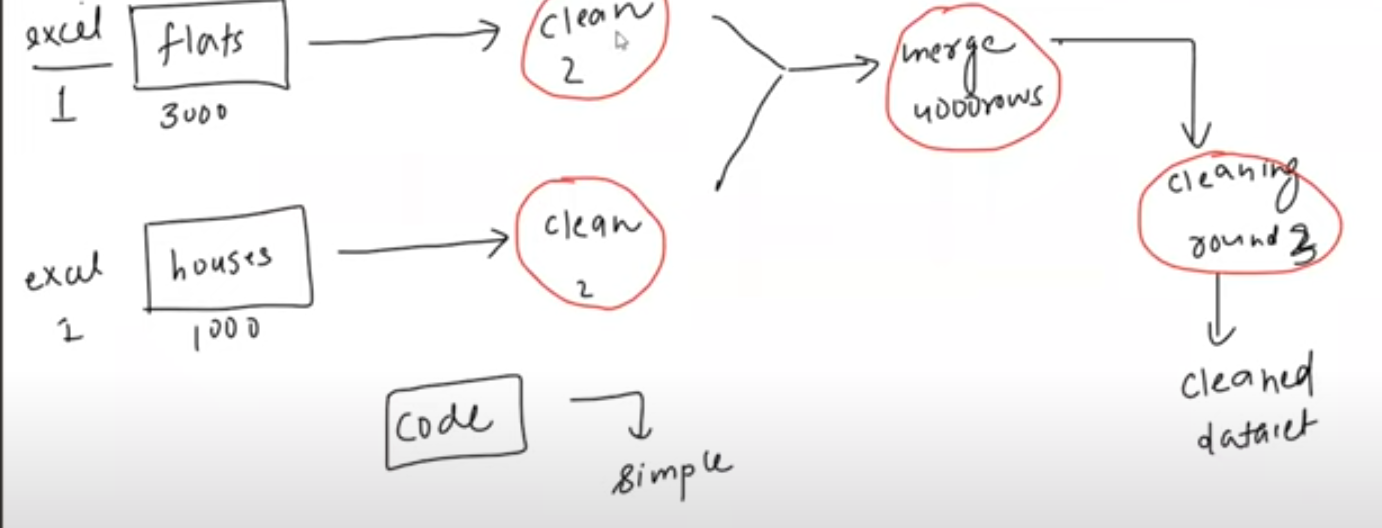

---






In [1]:
# import necessary files
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

---
## Load data

In [2]:
input1 = '../data/clean-data/flats_cleaned.csv'
input2 = '../data/clean-data/house_cleaned.csv'
output= '../data/clean-data/flats-house-cleaned-v1.csv'

flats = pd.read_csv(input1)
houses = pd.read_csv(input2)

In [3]:
df = pd.concat([flats,houses],ignore_index=True)

In [10]:
# saving the merged dataset; it will be used in analytics to create the map and word cloud
df.to_csv('../data/clean-data/flats-house-cleaned-v0.csv',index=False)

In [4]:
# Shuffle the DataFrame rows randomly while keeping the index reset
df = df.sample(df.shape[0],ignore_index=True)

df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,4 Bedroom House for sale in Malibu Town,house,independent,0.99,17187.0,576.0,Plot area 64(53.51 sq.m.),4,4,3,not available,"Malibu Town, Gurgaon, Haryana",4.0,NaN,1 to 5 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...","Malibue towen in sector 47, 60 sq yard indepen...",[],"['Maintenance Staff', 'Rain Water Harvesting']","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,1 BHK Flat in Sector 78 Gurgaon,flat,raheja revanta,1.20,10018.0,1198.0,Super Built up area 1197.8(111.28 sq.m.)Carpet...,1,2,2,not available,"Sector 78 Gurgaon, Gurgaon, Haryana",32.0,NaN,Under Construction,"['Sapphire 83 Mall', 'NH-8', 'Bal Bharti Publi...",Residential apartment for sell.Located on 32nd...,NaN,"['Lift(s)', 'Maintenance Staff', 'Swimming Poo...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,4 BHK Flat in Sector 63 Gurgaon,flat,dlf the arbour,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area:...,4,4,3+,not available,"A341, Sector 63 Gurgaon, Gurgaon, Haryana",34.0,NaN,Jan 2028,"['Radhakrishna Shani Mandir', 'pracksht hospit...","Dlf arbour apartment for sell, builder buyer a...",[],NaN,NaN
3,5 Bedroom House for sale in Sector 109 Gurgaon,house,international city by sobha phase 1,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room","H No, Sector 109 Gurgaon, Gurgaon, Haryana",2.0,North-East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...","Sobha international city, a luxury row houses,...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
4,3 BHK Flat in Sector 89 Gurgaon,flat,nbcc heights,1.50,7058.0,2125.0,Super Built up area 2125(197.42 sq.m.),3,3,3,"study room,servant room","D-801, Sector 89 Gurgaon, Gurgaon, Haryana",8.0,NaN,1 to 5 Year Old,"['Reliance MART', 'Lotus Rise World School', '...","Ready to move, auspicious property. Only serio...","['4 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area4.5 out of 5', 'Construction4.5 ou..."


In [5]:
df.shape

(3961, 20)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    3961 non-null   object 
 1   property_type    3961 non-null   object 
 2   society          3960 non-null   object 
 3   price            3941 non-null   float64
 4   price_per_sqft   3941 non-null   float64
 5   area             3941 non-null   float64
 6   areaWithType     3961 non-null   object 
 7   bedRoom          3961 non-null   int64  
 8   bathroom         3961 non-null   int64  
 9   balcony          3961 non-null   object 
 10  additionalRoom   3961 non-null   object 
 11  address          3950 non-null   object 
 12  floorNum         3940 non-null   float64
 13  facing           2784 non-null   object 
 14  agePossession    3960 non-null   object 
 15  nearbyLocations  3754 non-null   object 
 16  description      3961 non-null   object 
 17  furnishDetails

In [8]:
df.isnull().sum()

property_name         0
property_type         0
society               1
price                20
price_per_sqft       20
area                 20
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
address              11
floorNum             21
facing             1177
agePossession         1
nearbyLocations     207
description           0
furnishDetails     1032
features            709
rating              450
dtype: int64

In [9]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,4 Bedroom House for sale in Malibu Town,house,independent,0.99,17187.0,576.0,Plot area 64(53.51 sq.m.),4,4,3,not available,"Malibu Town, Gurgaon, Haryana",4.0,NaN,1 to 5 Year Old,"['Standard chartered ATM', 'Icici bank ATM', '...","Malibue towen in sector 47, 60 sq yard indepen...",[],"['Maintenance Staff', 'Rain Water Harvesting']","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,1 BHK Flat in Sector 78 Gurgaon,flat,raheja revanta,1.20,10018.0,1198.0,Super Built up area 1197.8(111.28 sq.m.)Carpet...,1,2,2,not available,"Sector 78 Gurgaon, Gurgaon, Haryana",32.0,NaN,Under Construction,"['Sapphire 83 Mall', 'NH-8', 'Bal Bharti Publi...",Residential apartment for sell.Located on 32nd...,NaN,"['Lift(s)', 'Maintenance Staff', 'Swimming Poo...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,4 BHK Flat in Sector 63 Gurgaon,flat,dlf the arbour,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area:...,4,4,3+,not available,"A341, Sector 63 Gurgaon, Gurgaon, Haryana",34.0,NaN,Jan 2028,"['Radhakrishna Shani Mandir', 'pracksht hospit...","Dlf arbour apartment for sell, builder buyer a...",[],NaN,NaN
3,5 Bedroom House for sale in Sector 109 Gurgaon,house,international city by sobha phase 1,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,"study room,servant room","H No, Sector 109 Gurgaon, Gurgaon, Haryana",2.0,North-East,1 to 5 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...","Sobha international city, a luxury row houses,...","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 G...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
4,3 BHK Flat in Sector 89 Gurgaon,flat,nbcc heights,1.50,7058.0,2125.0,Super Built up area 2125(197.42 sq.m.),3,3,3,"study room,servant room","D-801, Sector 89 Gurgaon, Gurgaon, Haryana",8.0,NaN,1 to 5 Year Old,"['Reliance MART', 'Lotus Rise World School', '...","Ready to move, auspicious property. Only serio...","['4 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area4.5 out of 5', 'Construction4.5 ou..."


---
## property_name

In [185]:
df.insert(loc=3,column='sector',value=df['property_name'].str.split('in').str.get(1).str.replace('Gurgaon','').str.strip())

In [186]:
df.head()

,property_name,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 77 Gurgaon,flat,emaar mgf palm hills,Sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,not available,"Sector 77 Gurgaon, Gurgaon, Haryana",4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Soh...",This beautiful north east facing 3 bhk flat in...,"['10 Wardrobe', '1 Water Purifier', '5 Fan', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4 out of 5', 'Amenities5 out of 5'..."
1,3 BHK Flat in Sector 108 Gurgaon,flat,raheja vedaanta,Sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,servant room,"203, Sector 108 Gurgaon, Gurgaon, Haryana",2.0,North-East,1 to 5 Year Old,NaN,Check out this 3 bhk apartment for sale in rah...,"['7 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Power Back-up', 'Feng Shui / Vaastu Complian...","['Green Area4 out of 5', 'Construction4 out of..."
2,2 BHK Flat in Subhash Nagar,flat,511 sarahah tower,Subhash Nagar,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,pooja room,"0002, Subhash Nagar, Gurgaon, Haryana",0.0,NaN,0 to 1 Year Old,"['Hanuman Mandir', 'Kharbanda Maternity and Nu...",This 2 bhk apartment is available for sale in ...,"['1 Bed', '1 Water Purifier', '1 Fan', '1 Frid...",NaN,"['Environment3.5 out of 5', 'Lifestyle4.5 out ..."
3,2 BHK Flat in Sector 99A Gurgaon,flat,laxmi pareena,Sector 99A,0.30,6666.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12.0,North,undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5..."
4,3 BHK Flat in Sector 102 Gurgaon,flat,emaar gurgaon greens,Sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,servant room,"1st, Sector 102 Gurgaon, Gurgaon, Haryana",7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...",Emaar gurgaon greens is one of gurgaon's most ...,"['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC',...","['Centrally Air Conditioned', 'Security / Fire...","['Green Area5 out of 5', 'Construction4 out of..."


---
## Sector

In [187]:
df['sector'] = df['sector'].str.lower()
df.head()

,property_name,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 77 Gurgaon,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,not available,"Sector 77 Gurgaon, Gurgaon, Haryana",4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Soh...",This beautiful north east facing 3 bhk flat in...,"['10 Wardrobe', '1 Water Purifier', '5 Fan', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4 out of 5', 'Amenities5 out of 5'..."
1,3 BHK Flat in Sector 108 Gurgaon,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,servant room,"203, Sector 108 Gurgaon, Gurgaon, Haryana",2.0,North-East,1 to 5 Year Old,NaN,Check out this 3 bhk apartment for sale in rah...,"['7 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Power Back-up', 'Feng Shui / Vaastu Complian...","['Green Area4 out of 5', 'Construction4 out of..."
2,2 BHK Flat in Subhash Nagar,flat,511 sarahah tower,subhash nagar,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,pooja room,"0002, Subhash Nagar, Gurgaon, Haryana",0.0,NaN,0 to 1 Year Old,"['Hanuman Mandir', 'Kharbanda Maternity and Nu...",This 2 bhk apartment is available for sale in ...,"['1 Bed', '1 Water Purifier', '1 Fan', '1 Frid...",NaN,"['Environment3.5 out of 5', 'Lifestyle4.5 out ..."
3,2 BHK Flat in Sector 99A Gurgaon,flat,laxmi pareena,sector 99a,0.30,6666.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12.0,North,undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5..."
4,3 BHK Flat in Sector 102 Gurgaon,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,servant room,"1st, Sector 102 Gurgaon, Gurgaon, Haryana",7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...",Emaar gurgaon greens is one of gurgaon's most ...,"['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC',...","['Centrally Air Conditioned', 'Security / Fire...","['Green Area5 out of 5', 'Construction4 out of..."


In [188]:
df['sector'].value_counts()

sector
sohna                                                        163
sector 102                                                   113
sector 85                                                    110
sector 92                                                    104
sector 69                                                     94
sector 65                                                     90
sector 81                                                     90
sector 90                                                     90
sector 109                                                    88
sector 79                                                     80
sector 83                                                     69
sector 37d                                                    68
sector 86                                                     67
sector 104                                                    66
sector 107                                                    60
sector 108        

In [189]:
df1 = df

In [190]:
replacements = {
    'dharam colony': 'sector 12',
    'krishna colony': 'sector 7',
    'suncity': 'sector 54',
    'prem nagar': 'sector 13',
    'mg road': 'sector 28',
    'gandhi nagar': 'sector 28',
    'laxmi garden': 'sector 11',
    'shakti nagar': 'sector 11',
    'saraswati vihar': 'sector 28',
    'arjun nagar': 'sector 8',
    'ravi nagar': 'sector 9',
    'vishnu garden': 'sector 105',
    'bhondsi': 'sector 11',
    'surya vihar': 'sector 21',
    'devilal colony': 'sector 9',
    'valley view estate': 'gwal pahari',
    'mehrauli  road': 'sector 14',
    'jyoti park': 'sector 7',
    'ansal plaza': 'sector 23',
    'dayanand colony': 'sector 6',
    'sushant lok phase 2': 'sector 55',
    'chakkarpur': 'sector 28',
    'greenwood city': 'sector 45',
    'subhash nagar': 'sector 12',
    'sohna road road': 'sohna road',
    'malibu town': 'sector 47',
    'surat nagar 1': 'sector 104',
    'new colony': 'sector 7',
    'mianwali colony': 'sector 12',
    'jacobpura': 'sector 12',
    'rajiv nagar': 'sector 13',
    'ashok vihar': 'sector 3',
    'dlf phase 1': 'sector 26',
    'nirvana country': 'sector 50',
    'palam vihar': 'sector 2',
    'dlf phase 2': 'sector 25',
    'sushant lok phase 1': 'sector 43',
    'laxman vihar': 'sector 4',
    'dlf phase 4': 'sector 28',
    'dlf phase 3': 'sector 24',
    'sushant lok phase 3': 'sector 57',
    'dlf phase 5': 'sector 43',
    'rajendra park': 'sector 105',
    'uppals southend': 'sector 49',
    'sohna': 'sohna road',
    'ashok vihar phase 3 extension': 'sector 5',
    'south city 1': 'sector 41',
    'ashok vihar phase 2': 'sector 5'
}

for old, new in replacements.items():
    df['sector'] = df['sector'].str.replace(old, new)

In [191]:
df['sector'].value_counts()

sector
sohna road                                                   163
sector 102                                                   113
sector 85                                                    110
sector 92                                                    104
sector 69                                                     94
sector 81                                                     90
sector 65                                                     90
sector 90                                                     90
sector 109                                                    88
sector 79                                                     80
sector 104                                                    73
sector 83                                                     69
sector 37d                                                    68
sector 86                                                     67
sector 50                                                     65
sector 107        

In [192]:
# Filter the DataFrame to keep only sectors that have at least 3 occurrences
a = df['sector'].value_counts()[df['sector'].value_counts() >= 3]
df = df[df['sector'].isin(a.index)]

In [193]:
df['sector'].value_counts()

sector
sohna road                    163
sector 102                    113
sector 85                     110
sector 92                     104
sector 69                      94
sector 65                      90
sector 81                      90
sector 90                      90
sector 109                     88
sector 79                      80
sector 104                     73
sector 83                      69
sector 37d                     68
sector 86                      67
sector 50                      65
sector 107                     60
sector 108                     59
sector 56                      57
sector 95                      57
sector 89                      56
sector 48                      56
sector 2                       55
sector 70a                     54
sector 70                      53
sector 37c                     53
sector 43                      53
sector-33 sohna road           51
sector 84                      51
sector 26                      50
sector 

In [194]:
replacements = {
    'sector 95a': 'sector 95',
    'sector 23a': 'sector 23',
    'sector 12a': 'sector 12',
    'sector 3a': 'sector 3',
    'sector 110 a': 'sector 110',
    'patel nagar': 'sector 15',
    'a block sector 43': 'sector 43',
    'maruti kunj': 'sector 12',
    'b block sector 43': 'sector 43',
    'sector-33 sohna road': 'sector 33',
    'sector 1 manesar': 'manesar',
    'sector 4 phase 2': 'sector 4',
    'sector 1a manesar': 'manesar',
    'c block sector 43': 'sector 43',
    'sector 89 a': 'sector 89',
    'sector 2 extension': 'sector 2',
    'sector 36 sohna road': 'sector 36'
}

for old, new in replacements.items():
    df['sector'] = df['sector'].str.replace(old, new)


/tmp/ipykernel_117489/3519387580.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sector'] = df['sector'].str.replace(old, new)


In [195]:
# This line filters the DataFrame to show only the rows where the 'sector' column is equal to 'new'.
df[df['sector'] == 'new']

,property_name,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
733,4 BHK Flat in New Gurgaon,flat,dlf 76,new,4.00,11428.0,3500.0,Carpet area: 3500 (325.16 sq.m.),4,4,2,"study room,servant room","New Gurgaon, Gurgaon, Haryana",4.0,NaN,Jun 2027,"['Shri Balaji Hospital and Trauma Center', 'S....",This lovely 4 bhk apartment/flat in new gurgao...,"['6 Wardrobe', '1 Fridge', '8 Fan', '1 Exhaust...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN
828,4 BHK Flat in New Gurgaon,flat,sare homes,new,0.85,4786.0,1776.0,Super Built up area 1776(165 sq.m.),4,4,3,not available,"New Gurgaon, Gurgaon, Haryana",3.0,NaN,5 to 10 Year Old,"['Columbia Asia Hospital', 'Apex Multi Special...",Located in the popular residential address of ...,[],NaN,NaN
2213,2 BHK Flat in New Gurgaon,flat,takshila heights sector 37 c,new,0.67,5583.0,1200.0,Super Built up area 1200(111.48 sq.m.),2,2,2,not available,"New Gurgaon, Gurgaon, Haryana",3.0,NaN,1 to 5 Year Old,"['Shri Balaji Hospital and Trauma Center', 'S....",Check out this 2 bhk apartment for sale in tak...,[],"['Lift(s)', 'Swimming Pool', 'Visitor Parking'...",NaN
3339,2 BHK Flat in New Gurgaon,flat,green court,new,0.38,5507.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,not available,"New Gurgaon, Gurgaon, Haryana",7.0,NaN,Under Construction,"['Ing bank ATM', 'Dcb bank ATM', 'Indus ind ba...",We are the proud owners of this 2 bhk apartmen...,[],"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN


In [196]:
df.loc[955,'sector'] = 'sector 37'
df.loc[2800,'sector'] = 'sector 92'
df.loc[2838,'sector'] = 'sector 90'
df.loc[2857,'sector'] = 'sector 76'

In [197]:
df[df['sector'] == 'new sector 2']


,property_name,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
1038,2 BHK Flat in New Palam Vihar,flat,ompee k s residency,new sector 2,1.60,26936.0,594.0,Carpet area: 66 (55.18 sq.m.),2,2,2,not available,"New Palam Vihar, Gurgaon, Haryana",1.0,NaN,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",We are the proud owners of this 2 bhk apartmen...,NaN,NaN,"['Environment4 out of 5', 'Safety4 out of 5', ..."
1193,2 Bedroom House for sale in New Palam Vihar,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2,2,2,not available,"Ez-19 A, New Palam Vihar, Gurgaon, Haryana",3.0,West,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",There are availability of various facilities l...,"['1 Wardrobe', '3 Fan', '6 Light', 'No AC', 'N...","['Water Storage', 'Park', 'Visitor Parking']","['Environment4 out of 5', 'Lifestyle4 out of 5..."
1509,2 BHK Flat in New Palam Vihar,flat,my home,new sector 2,0.28,3166.0,884.0,Carpet area: 900 (83.61 sq.m.),2,1,1,others,"F 150/b, New Palam Vihar, Gurgaon, Haryana",2.0,NaN,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...","2 bhk room with wooden coverd ,1 drawing room,...","['3 Wardrobe', '5 Light', '1 Chimney', '1 Modu...","['Water Storage', 'Park']","['Environment4 out of 5', 'Safety4 out of 5', ..."
2418,3 Bedroom House for sale in New Palam Vihar,house,independent,new sector 2,1.00,8796.0,1137.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,3,2,2,pooja room,"Q-148, New Palam Vihar, Phase-2, Near Royal Oa...",1.0,North,10+ Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...","Ground and first floor, Ground floor: Ground f...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
3881,2 BHK Flat in New Palam Vihar,flat,my home,new sector 2,0.22,4400.0,500.0,Carpet area: 500 (46.45 sq.m.),2,2,1,not available,"New Palam Vihar, Gurgaon, Haryana",1.0,NaN,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",Cctv surveillance are provided here. There is ...,"['3 Fan', '1 Exhaust Fan', '15 Light', '1 Modu...",NaN,"['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."


In [198]:
df.loc[df.index.isin([320, 1189, 1963, 2695, 3296]), 'sector'] = 'sector 110'

In [199]:
df.shape

(3803, 21)

In [200]:
df.duplicated().sum()

np.int64(0)

In [201]:
df.head()

,property_name,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 77 Gurgaon,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,not available,"Sector 77 Gurgaon, Gurgaon, Haryana",4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Soh...",This beautiful north east facing 3 bhk flat in...,"['10 Wardrobe', '1 Water Purifier', '5 Fan', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4 out of 5', 'Amenities5 out of 5'..."
1,3 BHK Flat in Sector 108 Gurgaon,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,servant room,"203, Sector 108 Gurgaon, Gurgaon, Haryana",2.0,North-East,1 to 5 Year Old,NaN,Check out this 3 bhk apartment for sale in rah...,"['7 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Power Back-up', 'Feng Shui / Vaastu Complian...","['Green Area4 out of 5', 'Construction4 out of..."
2,2 BHK Flat in Subhash Nagar,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,pooja room,"0002, Subhash Nagar, Gurgaon, Haryana",0.0,NaN,0 to 1 Year Old,"['Hanuman Mandir', 'Kharbanda Maternity and Nu...",This 2 bhk apartment is available for sale in ...,"['1 Bed', '1 Water Purifier', '1 Fan', '1 Frid...",NaN,"['Environment3.5 out of 5', 'Lifestyle4.5 out ..."
3,2 BHK Flat in Sector 99A Gurgaon,flat,laxmi pareena,sector 99a,0.30,6666.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99...",12.0,North,undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5..."
4,3 BHK Flat in Sector 102 Gurgaon,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,servant room,"1st, Sector 102 Gurgaon, Gurgaon, Haryana",7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...",Emaar gurgaon greens is one of gurgaon's most ...,"['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC',...","['Centrally Air Conditioned', 'Security / Fire...","['Green Area5 out of 5', 'Construction4 out of..."


---
## drop useless features

In [202]:
# features to drop -> property_name, address, description, rating
df.drop(columns=['property_name', 'address', 'description', 'rating'],inplace=True)

/tmp/ipykernel_117489/1453130667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['property_name', 'address', 'description', 'rating'],inplace=True)


In [203]:
df.duplicated().sum()

np.int64(122)

In [204]:
df.to_csv(output,index=False)


### Next Steps: Feature engineering is required for the following features: 

`areaWithType`, `additionalRoom`, `facing`, `agePossession`, `furnishDetails`, `features`.

